In [1]:
# Managing the working directory. 
# NOTE: You DON'T want to change this. 
import sys
from pathlib import Path

p = Path("").cwd().parent.as_posix()
if p not in sys.path:
    sys.path.append(p)

In [2]:
%%time
import src as dp

CPU times: user 12.9 ms, sys: 4.98 ms, total: 17.9 ms
Wall time: 31.2 ms


In [3]:
try:
    from .. import src as dp
except ImportError:
    import src as dp
print(dp.__version__, dp.__all__)

0.1.2 ['figure', 'data', 'show', 'PlotSettings', 'PlotSettable', 'FigWrapper', 'AxesWrapper', 'PlotDataSet']


In [4]:
import numpy as np

np.random.seed(42)
d1 : np.ndarray = np.random.randn(1000) 
d2 : np.ndarray = np.random.randn(1000) 
d3 : np.ndarray = np.random.randn(1000) 
d4 : np.ndarray = np.random.randn(1000) 
d5 : np.ndarray = np.random.randn(1000) 

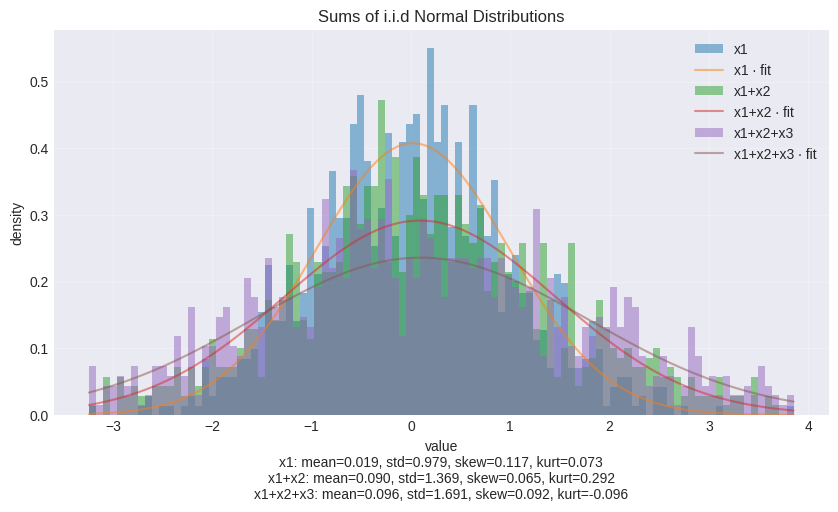

In [5]:
x1 = dp.data(d1)
x2 = dp.data(d2, "x2")
x3 = dp.data(d3, "x3")
s0 = x1.join(x1+x2, x1+x2+x3).set_plot(title="Sums of i.i.d Normal Distributions")
a0 = s0.hist()

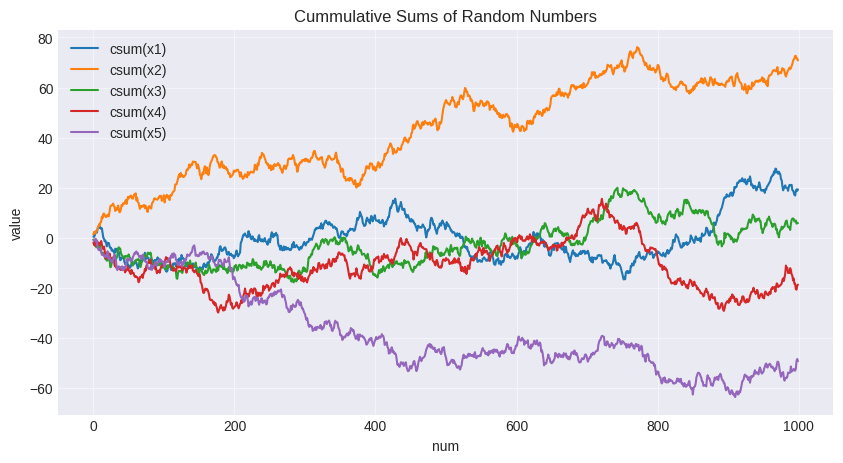

In [6]:
a1 = dp.data([d1, d2, d3, d4, d5]).cumsum()\
    .set_plot(title="Cummulative Sums of Random Numbers", xlabel="num", ylabel="value")\
    .plot()

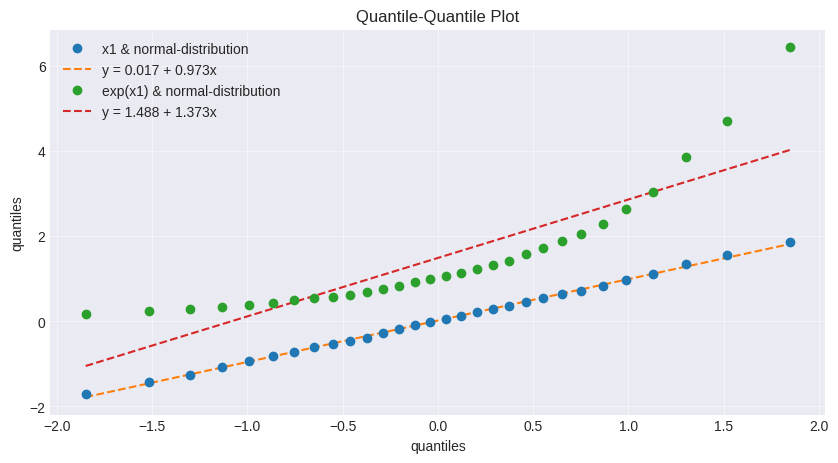

In [7]:
a2 = x1.join(x1.exp()).qqplot()

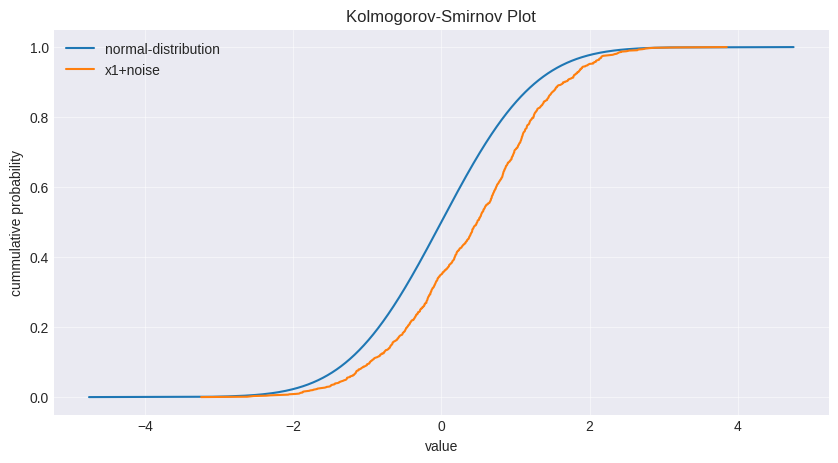

In [8]:
noise = dp.data((np.minimum(d1.max()-d1, d1-d1.min())/(d1.max()-d1.min())), "noise")
a3 = (x1 + noise).ksplot()

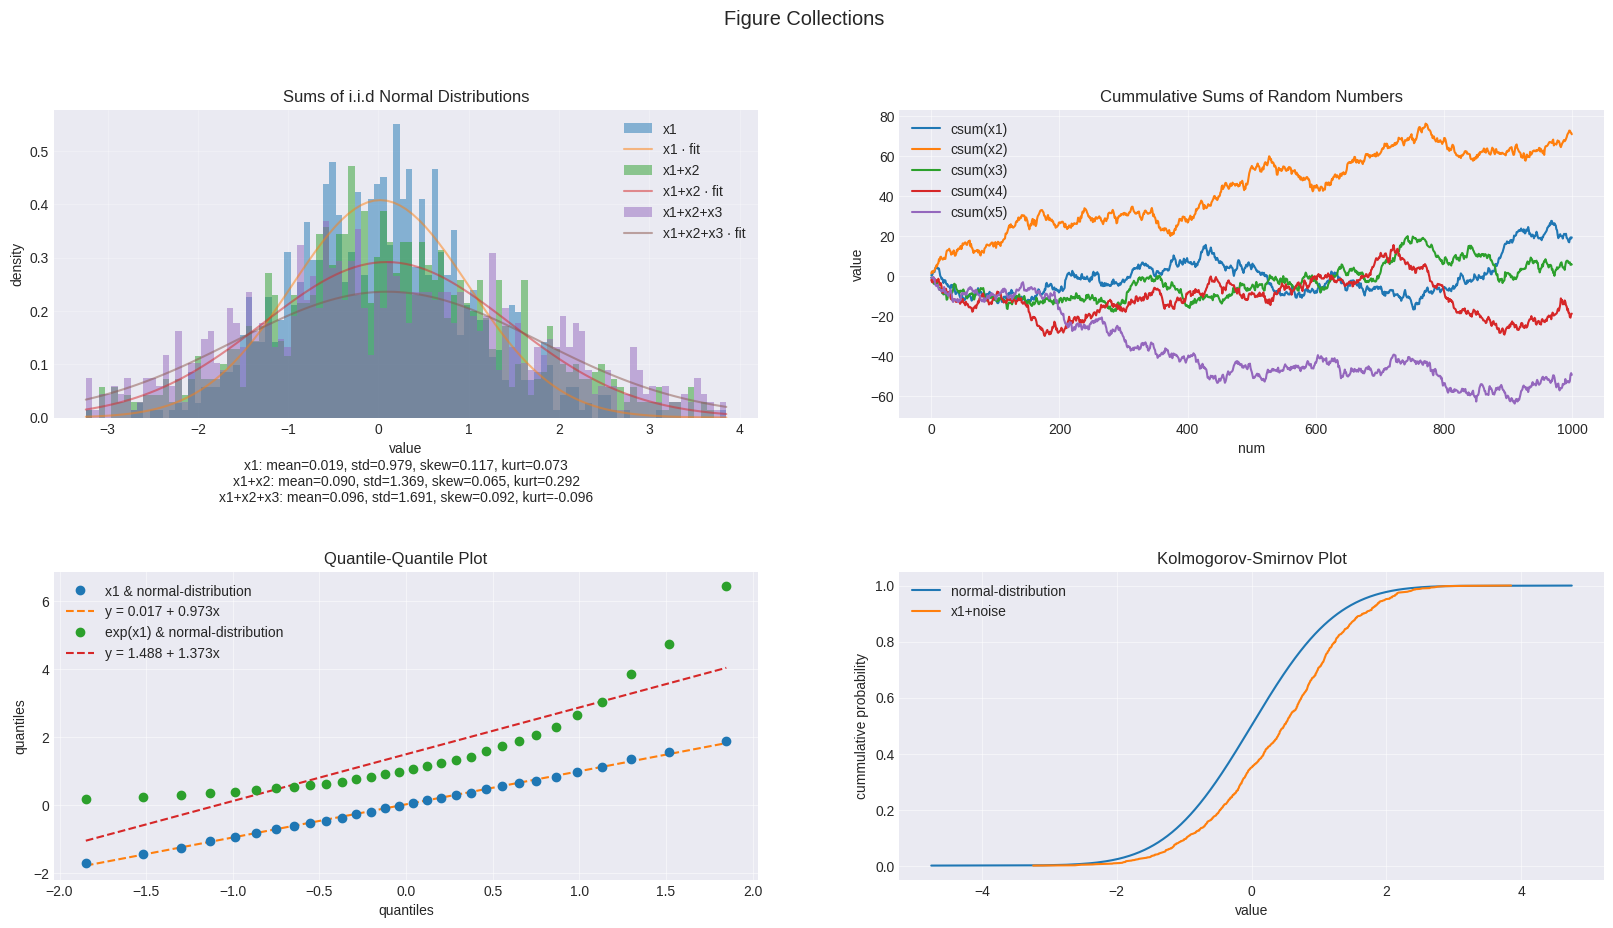

In [9]:
dp.show([a0, a1, a2, a3], title="Figure Collections")